Importar librerías y datos

In [55]:
# Manipulación de datos 
import pandas as pd
import re
import numpy as np

# Visualiazación 
import matplotlib.pyplot as plt
import requests
from PIL import Image

# Análisis de texto 
import string
from nltk.corpus import stopwords
import chardet
from wordcloud import WordCloud, STOPWORDS

# Módulo para manipular paths
from pathlib import Path

# Librería identificar el encoding de los archivos 
import chardet

# Conexión con base de datos 
import pymysql


In [56]:
# Función importar datasets
def importar(path):
    with open(path, 'rb') as f:     
        result = chardet.detect(f.read())
        # Para importar archivos csv
        if Path(path).suffix == ".csv": 
            data = pd.read_csv(path, encoding=result['encoding'], sep=None, engine='python', decimal='.')
            
    return data 

In [57]:
# Importar datos
df = importar(r"C:\Users\USER\Documents\SOYHENRY\LABS\PI03-Analytics-main\AccidentesAviones.csv")
print("Dimesiones de datos:", df.shape)

# Importar códigos de países 
paises_cod = importar(r'C:\Users\USER\Documents\SOYHENRY\LABS\Streamlit\all.csv')
print("Dimesiones de códigos de países:", paises_cod.shape)

cities_usa = importar(r'C:\Users\USER\Documents\SOYHENRY\LABS\Streamlit\uscities.csv')
print("Dimesiones de Ciudades USA:", cities_usa.shape)

Dimesiones de datos: (5008, 18)
Dimesiones de códigos de países: (249, 11)
Dimesiones de Ciudades USA: (30409, 17)


In [58]:
# Exploramos la infomación de nuestros datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [59]:
# Visualizamos los datos 
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [60]:
# Renombramos columnas 
df = df.rename(columns={'fecha':'Fecha',
                        'HORA declarada':'Hora_declarada', 
                        'Ruta':'Ubicación_accidente',
                        'OperadOR':'Operador', 
                        'flight_no':'Número_vuelo', 
                        'ac_type': 'Tipo_aeronave',
                        'route': 'Ruta', 
                        'registration':'Matrícula_OACI', 
                        'cn_ln': 'Número_fuselaje',
                        'all_aboard':'Total_a_bordo', 
                        'PASAJEROS A BORDO':'Pasajeros_a_bordo', 
                        'crew_aboard':'Tripulación_a_bordo', 
                        'cantidad de fallecidos':'Cantidad_fallecidos',
                        'passenger_fatalities':'Muertes_pasajeros', 
                        'crew_fatalities':'Muertes_tripulación', 
                        'ground':'Muertos_en_tierra',
                        'summary':'Descripción_accidente'
                        })

In [61]:
# Extraemos las columnas que usaremos en nuestro dashboard
df = df[['Fecha', 'Hora_declarada', 'Ubicación_accidente',
       'Operador', 'Número_vuelo', 'Ruta', 'Tipo_aeronave', 'Matrícula_OACI',
       'Número_fuselaje', 'Total_a_bordo', 'Pasajeros_a_bordo',
       'Tripulación_a_bordo', 'Cantidad_fallecidos', 'Muertes_pasajeros',
       'Muertes_tripulación', 'Muertos_en_tierra', 'Descripción_accidente']]

In [62]:
# Sustituímos los signos de interrogación por None
df = df.replace({'?':''})

Transformación

In [63]:
# Convertimos la columna Fecha en en datetime 
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convertimos las columnas numéricas en float
df['Total_a_bordo'] = pd.to_numeric(df['Total_a_bordo'])
df['Pasajeros_a_bordo'] = pd.to_numeric(df['Pasajeros_a_bordo'])
df['Tripulación_a_bordo'] = pd.to_numeric(df['Tripulación_a_bordo'])
df['Cantidad_fallecidos'] = pd.to_numeric(df['Cantidad_fallecidos'])
df['Muertes_pasajeros'] = pd.to_numeric(df['Muertes_pasajeros'])
df['Muertes_tripulación'] = pd.to_numeric(df['Muertes_tripulación'])
df['Muertos_en_tierra'] = pd.to_numeric(df['Muertos_en_tierra'])


In [64]:
# Exploramos los tipos de datos de nuestro dataset
df.dtypes.value_counts()

object            9
float64           7
datetime64[ns]    1
dtype: int64

In [65]:
df.describe()

,Total_a_bordo,Pasajeros_a_bordo,Tripulación_a_bordo,Cantidad_fallecidos,Muertes_pasajeros,Muertes_tripulación,Muertos_en_tierra
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [66]:
# Nomalizamos la columna de Ruta
df['Ruta'] = df['Ruta'].str.replace(': ', '')
df['Ruta'] = df['Ruta'].str.replace('"', '')
df['Ubicación_accidente'] = df['Ubicación_accidente'].str.replace('"', '')

In [67]:
# Normalizamos la columna 'Hora_declarada'
df['Hora_declarada'] = df['Hora_declarada'].replace(np.nan, '00:00') 
df['Hora_declarada'] = df['Hora_declarada'].str.replace('c: ', '')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('c:', '')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('c', '')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('12\'20', '12:20')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('18.40', '18:40')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('0943', '09:43')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('22\'08', '22:08')
df['Hora_declarada'] = df ['Hora_declarada'].str.replace('114:20', '00:00')

C:\Users\USER\AppData\Local\Temp\ipykernel_16820\620208078.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Hora_declarada'] = df ['Hora_declarada'].str.replace('18.40', '18:40')


In [68]:
# Convertimos el formato de la columna Hora_declarada de formato militar a formato estándar 
df['Hora_declarada'] = pd.to_datetime(df['Hora_declarada'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.strftime('%H:%M')

In [69]:
# Creamos función para extraer keywords de descripción 
def text_processing(text): 
    '''
    Esta función elimina los signos de puntuación y las palabras vacías del texto 
    
    Parámetros: 
    --------------
    : param text: Texto en formato str 

    Return: 
    --------------
    Lista Texto procesado en formato str
    '''

    # Creamos una lista de palabras del texto sin puntuación
    remove = [c for c in text if c not in string.punctuation]

    # Removemos caracteres especiales
    remove = [re.sub('\W', ' ', r) for r in text]

    # Removemos saltos de linea
    remove = [re.sub('[\n\r]', ' ', r) for r in text]

    # Removemos hipervínculos
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    remove = [re.sub(pattern, ' link ', r) for r in text]

    # Unimos todas las palabras de la lista creada en un solo string
    text = ''.join(remove)
    
    # Removemos stopswords, los espacio y devolvemos una lista 
    return  [c.lower() for c in text.split() if c.lower() not in stopwords.words('english') and c.isalpha() == True]

Crear columnas 

In [70]:
# Creamos la columna de keywords de descripción 
df['Keywords_description'] = df['Descripción_accidente'].apply(lambda x: text_processing(x))

In [71]:
# Creamos una nueva columna llamada Sobrevivientes 
df['Sobrevivientes'] = df['Total_a_bordo'] - df['Cantidad_fallecidos']

In [72]:
# Creamos las columnas año, mes y día 
df['Año'] = pd.DatetimeIndex(df['Fecha']).year
df['Mes'] = pd.DatetimeIndex(df['Fecha']).month
df['Día'] = pd.DatetimeIndex(df['Fecha']).day


In [73]:
# Creamos las funciones para crear las columnas de origen y destino
def origen(dataset, columna): 
    dataset['Origen'] = df[columna].apply(lambda x: (x.split('-')[0].strip()))
    return dataset['Origen']

def destino(dataset, columna): 
    dataset['Destino'] = dataset[columna].apply(lambda x: (x.split('-')[-1].strip()))
    for i in range(len(dataset[columna])): 
        if '-' in dataset.loc[i,columna]: 
            dataset['Destino'] = dataset[columna].apply(lambda x: (x.split('-')[-1].strip()))
    return dataset['Destino']

In [74]:
# Creamos las columnas de origen y destino
origen(df, 'Ruta')
destino(df, 'Ruta');

In [75]:
def pais_estado_ciudad(dataset, columna): 

    try:
        dataset['País'] =   df[columna].apply(lambda x: (x.split(',')[-1]).str.strip())
    except: 
        dataset['País'] =   None

    return dataset 

In [76]:
pais_estado_ciudad(df, 'Ubicación_accidente');

In [77]:
# Normalizar la columna de País 
df['País'] = df['País'].str.replace(': ', '')
df['País'] = df['País'].str.replace('(', '')
df['País'] = df['País'].str.replace(')', '')
df['País'] = df['País'].str.replace('\rAfghanistan', '')
df['País'] = df['País'].str.replace('110 miles West of ', '')
df['País'] = df['País'].str.replace('175 miles ', '')
df['País'] = df['País'].str.replace('325 miles east of ', '')
df['País'] = df['País'].str.replace('800 miles east of ', '')
df['País'] = df['País'].str.replace('Alakska', 'Alaska')
df['País'] = df['País'].str.replace('Alaksa', 'Alaska')
df['País'] = df['País'].str.replace('AK', 'Alaska')
df['País'] = df['País'].str.replace('Atlantic Ocean between N.Y. and Bermuda', 'Atlantic Ocean')
df['País'] = df['País'].str.replace('Atlantic Ocean off Florida', 'Atlantic Ocean')
df['País'] = df['País'].str.replace('Afghanistan', 'Afganistán')
df['País'] = df['País'].str.replace('Australila', 'Australia')
df['País'] = df['País'].str.replace('AustraliaAustralia', 'Australia')
df['País'] = df['País'].str.replace('Aregntina', 'Argentina')
df['País'] = df['País'].str.replace('Azores Portugal', 'Portugal')
df['País'] = df['País'].str.replace('Baangladesh', 'Bangladesh')
df['País'] = df['País'].str.replace('Barquisimeto Venezuela', 'Venezuela')
df['País'] = df['País'].str.replace('Belgian Congo Zaire', 'Belgian Congo')
df['País'] = df['País'].str.replace('BO', 'Bolivia')
df['País'] = df['País'].str.replace('Boliva', 'Bolivia')
df['País'] = df['País'].str.replace('Bulgeria','Bulgaria')
df['País'] = df['País'].str.replace('Bugaria','Bulgaria')
df['País'] = df['País'].str.replace('Canada2', 'Canada')
df['País'] = df['País'].str.replace(' coast', '')
df['País'] = df['País'].str.replace('Cailifornia', 'California')
df['País'] = df['País'].str.replace('Californiia', 'California')
df['País'] = df['País'].str.replace('Calilfornia', 'California')
df['País'] = df['País'].str.replace('CA', 'California')
df['País'] = df['País'].str.replace('Cameroons', 'Cameroon')
df['País'] = df['País'].str.replace('Centeral Afghanistan', 'Afghanistan')
df['País'] = df['País'].str.replace('Chicago Illinois', 'United States of America')
df['País'] = df['País'].str.replace('D.C.', 'United States of America')
df['País'] = df['País'].str.replace(' coast', '')
df['País'] = df['País'].str.replace(' coast', '')
df['País'] = df['País'].str.replace('Democratic Republic Cogo', 'Democratic Republic Congo')
df['País'] = df['País'].str.replace('Democratic Republic of the Congo', 'Democratic Republic Congo')
df['País'] = df['País'].str.replace('Democtratic Republic Congo', 'Democratic Republic Congo')
df['País'] = df['País'].str.replace('DR Congo', 'Democratic Republic Congo')
df['País'] = df['País'].str.replace('En route from Argentina  to  California', 'Argentina')
df['País'] = df['País'].str.replace('French Cameroons', '')
df['País'] = df['País'].str.replace('Gulf of Mexicooo', 'Gulf of Mexico')
df['País'] = df['País'].str.replace('Spain\r', '')
df['País'] = df['País'].str.replace('Near ', '')
df['País'] = df['País'].str.replace('Jamacia', 'Jamaica')
df['País'] = df['País'].str.replace(' International Airport', '')
df['País'] = df['País'].str.replace('Massachutes', 'Massachusetts')
df['País'] = df['País'].str.replace('Mexic', 'Mexico')
df['País'] = df['País'].str.replace('Mexicooooooooooo', 'Mexico')
df['País'] = df['País'].str.replace('Mexicoooooooooo', 'Mexico')
df['País'] = df['País'].str.replace('Mexicoooo', 'Mexico')
df['País'] = df['País'].str.replace('Mexicooooo', 'Mexico')
df['País'] = df['País'].str.replace('Mexicoo', 'Mexico')
df['País'] = df['País'].str.replace('Mexicooo', 'Mexico')
df['País'] = df['País'].str.replace('Minnisota', 'Minnesota')
df['País'] = df['País'].str.replace('Mississipi', 'Mississippi')
df['País'] = df['País'].str.replace('Morocco', 'Morocco')
df['País'] = df['País'].str.replace('New Mexicooo', 'New Mexico')
df['País'] = df['País'].str.replace('Niger', 'Nigeria')
df['País'] = df['País'].str.replace('Nigeriaiaiaiaiaiaia', 'Nigeria')
df['País'] = df['País'].str.replace('Nigeriaia', 'Nigeria')
df['País'] = df['País'].str.replace('Northern ', '')
df['País'] = df['País'].str.replace('Off  ', '')
df['País'] = df['País'].str.replace('Off', '')
df['País'] = df['País'].str.replace('off the ', '')
df['País'] = df['País'].str.replace('Off West ', '')
df['País'] = df['País'].str.replace('Off Western ', '')
df['País'] = df['País'].str.replace('Off the ', '')
df['País'] = df['País'].str.replace('off ', '')
df['País'] = df['País'].str.replace('of France', 'France')
df['País'] = df['País'].str.replace('Over ', '')
df['País'] = df['País'].str.replace('Over the ', '')
df['País'] = df['País'].str.replace('Over ', '')
df['País'] = df['País'].str.replace('Pacific Ocean between Manila and Guam', 'Pacific Ocean')
df['País'] = df['País'].str.replace('Pacific Ocean between Hong Kong and Macao', 'Pacific Ocean')
df['País'] = df['País'].str.replace('Philippine Sea', 'Philippines')
df['País'] = df['País'].str.replace('Phillipines', 'Philippines')
df['País'] = df['País'].str.replace('Philippine island of Elalat', 'Philippines')
df['País'] = df['País'].str.replace('Philipines', 'Philippines')
df['País'] = df['País'].str.replace('Qld. ', '')
df['País'] = df['País'].str.replace('Queensland Australia', 'Australia')
df['País'] = df['País'].str.replace('Russian', 'Russia')
df['País'] = df['País'].str.replace('Suriname', 'Surinam')
df['País'] = df['País'].str.replace('the ', '')
df['País'] = df['País'].str.replace('New Mexicooooooooooo', 'New Mexico')
df['País'] = df['País'].str.replace('Northwest Territories ', '')
df['País'] = df['País'].str.replace('Uzbekstan', 'Uzbekistan')
df['País'] = df['País'].str.replace('United States Territories', 'United States of America')
df['País'] = df['País'].str.replace('United States of America DC', 'United States of America')
df['País'] = df['País'].str.replace('United States of America United States of America', 'United States of America')
df['País'] = df['País'].str.replace('West Germany', 'Germany')
df['País'] = df['País'].str.replace('West Indies', 'Indies')
df['País'] = df['País'].str.replace('West Pakistan', 'Pakistan')
df['País'] = df['País'].str.replace('West Virginia', 'Virginia')
df['País'] = df['País'].str.replace('Washingon', 'United States of America')
df['País'] = df['País'].str.replace('Washington', 'United States of America')
df['País'] = df['País'].str.replace('Washington DC', 'United States of America')
df['País'] = df['País'].str.replace('Washington United States of America', 'United States of America')
df['País'] = df['País'].str.replace('West Indies', 'Indies')
df['País'] = df['País'].str.replace('West Pakistan', 'Pakistan')
df['País'] = df['País'].str.replace('West Virginia', 'Virginia')
df['País'] = df['País'].str.replace('Yugosalvia', 'Yugoslavia')
df['País'] = df['País'].str.replace('Yugosalvia', 'Yugoslavia')

df['País'] = df['País'].str.strip()


C:\Users\USER\AppData\Local\Temp\ipykernel_16820\2573814942.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['País'] = df['País'].str.replace('(', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_16820\2573814942.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['País'] = df['País'].str.replace(')', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_16820\2573814942.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['País'] = df['País'].str.replace('Atlantic Ocean between N.Y. and Bermuda', 'Atlantic Ocean')
C:\Users\USER\AppData\Local\Temp\ipykernel_16820\2573814942.py:36: FutureWarning: The default value of regex w

In [ ]:
state_name =    list(cities_usa.state_name.unique())
state_id =      list(cities_usa.state_id.unique())       

for i in range(len(state_name)): 
    for j in range(len(df['País'])): 
        ubicacion_accidente =   df.loc[j, 'País']
        estados_usa =           state_name[i]
        codigo_estado_usa =     state_id[i]
        if ubicacion_accidente in estados_usa or ubicacion_accidente == codigo_estado_usa: 
            df.loc[j, 'País'] = 'United States of America'

Subsets

In [81]:
# Cantidad de fallecidos por operador
df['Operador'] = df['Operador'].str.upper() 
operator = df[['Operador','Cantidad_fallecidos']].groupby('Operador').agg(['sum','count'])
operator

Cantidad_fallecidos      
                                              sum count
Operador                                               
                                             86.0    10
46826/109                                     1.0     1
A B AEROTRANSPORT                             3.0     2
AAXICO AIRLINES                               9.0     3
AB AEROTRANSPORT                             65.0     4
...                                           ...   ...
ZAKAVIA                                       5.0     1
ZANEX                                         1.0     1
ZANTOP AIR TRANSPORT                         10.0     3
ZANTOP INTERNATIONAL AIRLINES                 4.0     1
ÈKODA (INDIA) LTD                             3.0     1

[2258 rows x 2 columns]

In [83]:
# Cantidad de fallecidos por Tipo de Aeronave
df['Tipo_aeronave'] = df['Tipo_aeronave'].str.upper() 
Tipo_aeronave = df[['Tipo_aeronave','Cantidad_fallecidos']].groupby('Tipo_aeronave').agg(['sum','count'])
Tipo_aeronave

Cantidad_fallecidos      
                                        sum count
Tipo_aeronave                                    
                                      158.0    11
A-7D CORSAIR                           10.0     1
AAC-1 TOUCAN                           23.0     1
AEGK                                    5.0     1
AERO COMMANDER  520                     6.0     1
...                                     ...   ...
ZEPPELIN L-59 (AIRSHIP)                23.0     1
ZEPPELIN L-70 (AIRSHIP)                22.0     1
ZEPPELIN L-8 (AIRSHIP)                 17.0     1
ZEPPELIN LZ-129                        35.0     1
ZEPPLIN L-48 (AIR SHIP)                14.0     1

[2416 rows x 2 columns]

In [84]:
# Cantidad de fallecidos por ubicación de accidente 
df['Ubicación_accidente'] = df['Ubicación_accidente'].str.upper() 
Ubicación_accidente = df[['Ubicación_accidente','Cantidad_fallecidos']].groupby('Ubicación_accidente').agg(['sum','count'])
Ubicación_accidente

Cantidad_fallecidos      
                                                             sum count
Ubicación_accidente                                                   
                                                            23.0     5
1,200 MILES OFF DAKAR, ATLANTIC OCEAN                       52.0     1
110 MILES SW OF SOCHI, RUSSIA                               78.0     1
125 MILES ENE OF TOKYO, JAPAN                                6.0     1
175 MILES OFF THE EGYPTIAN COAST                            66.0     1
...                                                          ...   ...
ZHENGCHANG, SUIYANG COUNTY, GUIZHOU PROVINCE                12.0     1
ZHENGZHOU-XINZHENG, CHINA                                    1.0     1
ZIFTA, EGYPT                                                 4.0     1
ZURICH, SWITZERLAND                                         99.0     4
ZWINGLE, IOWA                                                8.0     1

[4124 rows x 2 columns]

In [85]:
# Cantidad de fallecidos por ruta 
df['Ruta'] = df['Ruta'].str.upper() 
Ruta = df[['Ruta','Cantidad_fallecidos']].groupby('Ruta').agg(['sum','count'])
Ruta

Cantidad_fallecidos      
                                                      sum count
Ruta                                                           
                                                   8877.0   755
 COMOX-PORT HARDY                                     4.0     1
14099                                                 3.0     1
ABADAN - TEHRAN                                      27.0     1
ABAKAN - PETROPAVLOSK - KAMCHATSKY                   23.0     1
...                                                   ...   ...
ZURICH - STUTTGART - LEIPZIG - BERLIN                12.0     1
ZURICH - TEL AVIV                                    47.0     1
ZURICH-GENÈVE-FUNCHAL                                36.0     1
ZYRYANKA - SREDNEKYMSK                               23.0     1
ZÜRICH - DRESDEN                                     10.0     1

[3835 rows x 2 columns]

In [86]:
# Cantidad de fallecidos por hora declarada
Hora_declarada = df[['Hora_declarada','Cantidad_fallecidos']].groupby('Hora_declarada').agg(['sum','count'])
Hora_declarada

Cantidad_fallecidos      
                               sum count
Hora_declarada                          
00:00                      17299.0  1497
00:01                          1.0     1
00:02                         11.0     1
00:04                         14.0     2
00:05                         90.0     2
...                            ...   ...
23:55                         79.0     3
23:56                        105.0     3
23:57                         24.0     1
23:58                          4.0     1
23:59                         31.0     2

[1035 rows x 2 columns]

Visualización

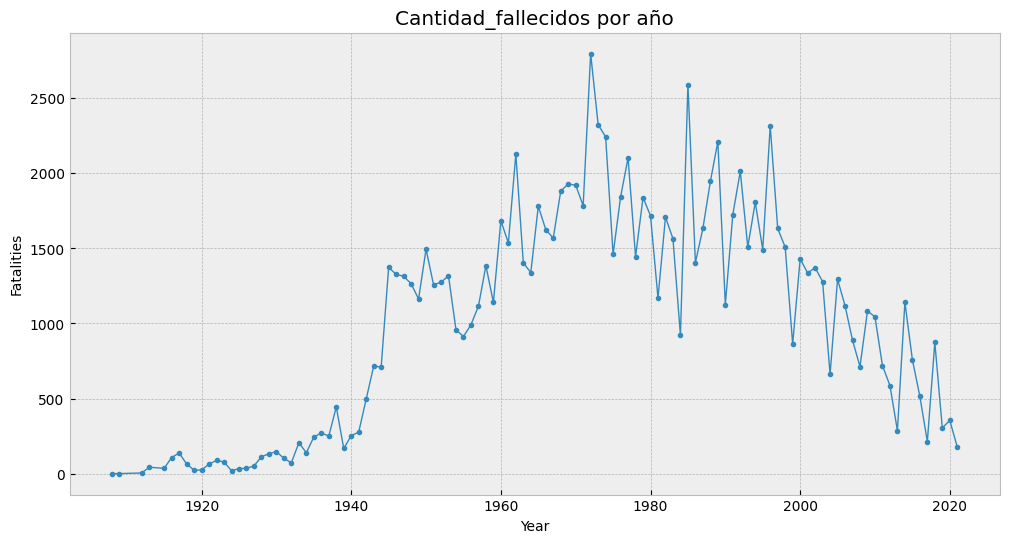

In [105]:
yearly = df[['Año','Cantidad_fallecidos']].groupby('Año').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Cantidad_fallecidos','sum'].plot(title='Cantidad_fallecidos por año',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()

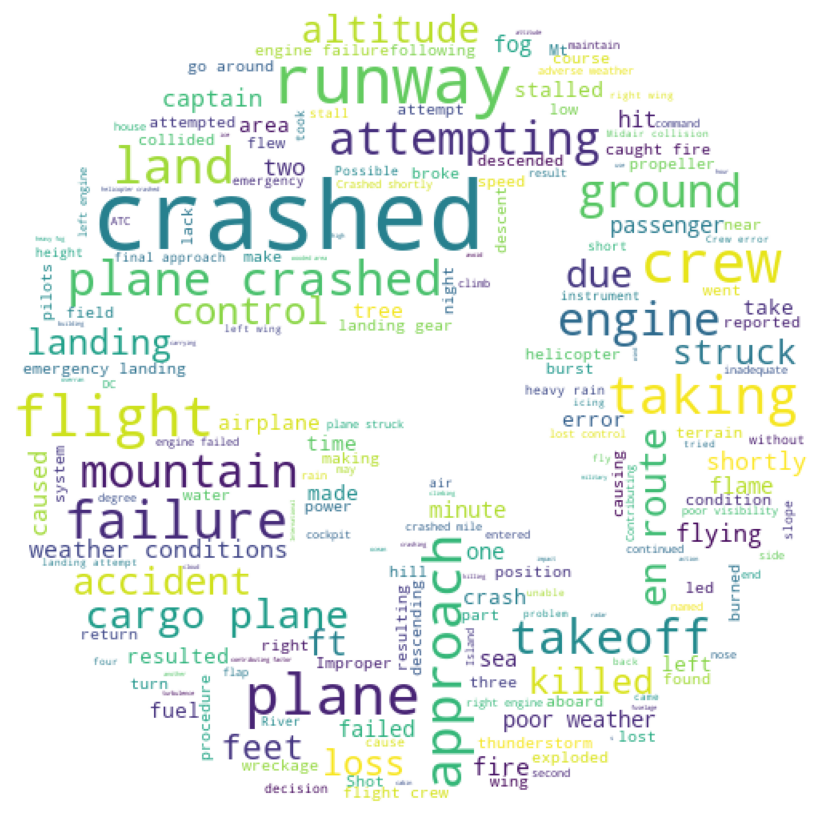

In [100]:
# Graficamos las keywords de la descripción 
text = str(df.Descripción_accidente.tolist())
mask = np.array(Image.open(requests.get('https://c7.uihere.com/files/303/182/469/blue-airplane-icon-vector.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

Extracción

In [ ]:
df.to_csv('AccidentesAviones_tranform.csv', sep=';', index=False)

In [ ]:
# Connect to the database
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='1234',
                         db='Henry_P3')

# create cursor
cursor=connection.cursor()

# creating column list for insertion
cols = "`,`".join([str(i) for i in df.columns.tolist()])

# Insert DataFrame recrds one by one.
for i,row in df.iterrows():
    sql = "INSERT INTO `Accidentes_aéreos` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

    # the connection is not autocommitted by default, so we must commit to save our changes
    connection.commit()

connection.close()